In [1]:
import pandas as pd,numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df_raw_data = pd.read_csv(url)
df = df_raw_data.copy()

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-08-23T19:44:25.390Z,37.613667,-121.893333,14.84,2.26,md,7.0,181.00,0.198500,0.1400,...,2025-08-23T19:52:20.150Z,"1 km N of Sunol, CA",earthquake,1.61,0.96,0.490,3.0,automatic,nc,nc
1,2025-08-23T19:38:25.150Z,33.259500,-116.419667,4.58,1.24,ml,57.0,25.00,0.008927,0.2100,...,2025-08-23T19:42:02.647Z,"4 km W of Borrego Springs, CA",earthquake,0.16,0.35,0.182,27.0,automatic,ci,ci
2,2025-08-23T19:33:37.763Z,36.997800,-116.201900,2.60,0.90,ml,17.0,48.99,0.062000,0.2508,...,2025-08-23T19:36:03.174Z,"50 km E of Beatty, Nevada",earthquake,NaN,0.70,0.300,12.0,automatic,nn,nn
3,2025-08-23T19:19:36.750Z,38.822498,-122.813332,1.64,0.28,md,7.0,124.00,0.002698,0.0100,...,2025-08-23T19:21:13.770Z,"7 km NNW of The Geysers, CA",earthquake,0.49,1.15,0.160,9.0,automatic,nc,nc
4,2025-08-23T19:14:37.599Z,60.333200,-152.410400,91.90,1.60,ml,NaN,NaN,NaN,0.3700,...,2025-08-23T19:16:24.854Z,"51 km NW of Ninilchik, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak


In [4]:
df.shape

(11082, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 0 to 11081
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11082 non-null  object 
 1   latitude         11082 non-null  float64
 2   longitude        11082 non-null  float64
 3   depth            11082 non-null  float64
 4   mag              11082 non-null  float64
 5   magType          11082 non-null  object 
 6   nst              9429 non-null   float64
 7   gap              9429 non-null   float64
 8   dmin             9427 non-null   float64
 9   rms              11081 non-null  float64
 10  net              11082 non-null  object 
 11  id               11082 non-null  object 
 12  updated          11082 non-null  object 
 13  place            11082 non-null  object 
 14  type             11082 non-null  object 
 15  horizontalError  8862 non-null   float64
 16  depthError       11082 non-null  float64
 17  magError    

In [6]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,11082.000000,11082.000000,11082.000000,11082.000000,9429.000000,9429.000000,9427.000000,11081.000000,8862.000000,11082.000000,9408.000000,9428.000000
mean,41.425100,-83.471033,19.574872,1.748314,28.830947,108.251043,0.594638,0.320967,2.563063,2.278977,0.166102,32.182011
std,17.384082,102.687291,45.706960,1.563894,28.233778,58.054641,1.685955,0.315168,3.863491,7.137771,0.096201,75.260417
min,-65.021900,-179.933800,-3.490000,-1.340000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.728333,-147.687825,3.730000,0.750000,11.000000,66.000000,0.021025,0.100000,0.280000,0.500000,0.100000,8.000000
50%,38.835167,-117.690500,8.150000,1.300000,20.000000,95.000000,0.063760,0.190000,0.530000,0.877466,0.154000,14.000000
75%,52.870675,-102.066000,14.969750,2.200000,36.000000,136.000000,0.235400,0.510000,2.304699,1.897000,0.203000,25.000000
max,83.435300,179.957200,635.293000,8.800000,338.000000,350.000000,47.502000,3.190000,23.910000,577.500000,0.940000,982.000000


In [7]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1653
gap                1653
dmin               1655
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2220
depthError            0
magError           1674
magNst             1654
status                0
locationSource        0
magSource             0
dtype: int64

In [8]:
df['time'] = pd.to_datetime(df['time'],utc=True)
df['mag'] = pd.to_numeric(df['mag'],errors='coerce')

In [9]:
df['mag'].max()

8.8

In [10]:
df['mag'].min()   #WE HAVE TO REMOVE NEGATIVE AND NA MAGNITUDES

-1.34

In [11]:
df = df[(df['mag'] >= 0) & (df['mag'].notna())]

In [12]:
df['mag'].info

<bound method Series.info of 0        2.26
1        1.24
2        0.90
3        0.28
4        1.60
         ... 
11077    0.36
11078    1.58
11079    0.25
11080    2.00
11081    1.08
Name: mag, Length: 10217, dtype: float64>

In [13]:
df.duplicated().sum()

0

In [14]:
df['depth'] = pd.to_numeric(df['depth'],errors='coerce')

In [15]:
month_list=df['time'].dt.month.tolist()
month_list
res = list(dict.fromkeys(month_list))
print(res)

[8, 7]


In [16]:
df['year']=df['time'].dt.year

In [17]:
df['month']=df['time'].dt.month
df['day_of_week']=df['time'].dt.day_name()

In [18]:
df.sort_values(by='mag',ascending=False).head()   #A PROOF THAT THIS IS REAL TIME SRC:A MAGNITUDE OF 7.5 JUST OCCURED IN 22TH AUGUST 2025

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,day_of_week
9039,2025-07-29 23:24:52.480000+00:00,52.4980,160.2637,35.000,8.8,mww,251.0,30.0,1.113,0.77,...,7.62,1.805,0.018,303.0,reviewed,us,us,2025,7,Tuesday
401,2025-08-22 02:16:19.202000+00:00,-60.1859,-61.8206,10.843,7.5,mww,71.0,67.0,4.720,1.16,...,9.55,4.257,0.055,32.0,reviewed,us,us,2025,8,Friday
9478,2025-07-28 22:10:35.109000+00:00,-57.6050,157.0388,31.000,7.0,mww,128.0,21.0,3.292,0.82,...,9.63,1.777,0.031,99.0,reviewed,us,us,2025,7,Monday
9001,2025-07-30 00:09:56.968000+00:00,52.2075,159.8598,20.794,6.9,mww,83.0,68.0,1.101,0.91,...,8.66,4.316,0.098,10.0,reviewed,us,us,2025,7,Wednesday
6674,2025-08-03 05:37:55.562000+00:00,50.5804,157.7988,35.000,6.8,mww,106.0,44.0,2.503,0.96,...,7.95,1.880,0.053,34.0,reviewed,us,us,2025,8,Sunday


In [19]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,day_of_week
0,2025-08-23 19:44:25.390000+00:00,37.613667,-121.893333,14.84,2.26,md,7.0,181.00,0.198500,0.1400,...,1.61,0.96,0.490,3.0,automatic,nc,nc,2025,8,Saturday
1,2025-08-23 19:38:25.150000+00:00,33.259500,-116.419667,4.58,1.24,ml,57.0,25.00,0.008927,0.2100,...,0.16,0.35,0.182,27.0,automatic,ci,ci,2025,8,Saturday
2,2025-08-23 19:33:37.763000+00:00,36.997800,-116.201900,2.60,0.90,ml,17.0,48.99,0.062000,0.2508,...,NaN,0.70,0.300,12.0,automatic,nn,nn,2025,8,Saturday
3,2025-08-23 19:19:36.750000+00:00,38.822498,-122.813332,1.64,0.28,md,7.0,124.00,0.002698,0.0100,...,0.49,1.15,0.160,9.0,automatic,nc,nc,2025,8,Saturday
4,2025-08-23 19:14:37.599000+00:00,60.333200,-152.410400,91.90,1.60,ml,NaN,NaN,NaN,0.3700,...,NaN,0.80,NaN,NaN,automatic,ak,ak,2025,8,Saturday


In [20]:
print(f"There are {len(df)} earthquakes in past 30 days.")

There are 10217 earthquakes in past 30 days.


In [21]:
def category(mag):
    if mag < 2.5:
        return 'Minor'
    elif mag < 4.5:
        return 'Light'
    elif mag < 6.0:
        return 'Moderate'
    elif mag < 7.0:
        return 'Strong'
    else:
        return 'Major'

In [22]:
df["Category"] = df['mag'].apply(category)

In [23]:
category_counts = df['Category'].value_counts()
category_counts

Category
Minor       7754
Light       1223
Moderate    1214
Strong        23
Major          3
Name: count, dtype: int64

In [24]:
majors = df[df['Category'] == 'Major']
majors

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,year,month,day_of_week,Category
401,2025-08-22 02:16:19.202000+00:00,-60.1859,-61.8206,10.843,7.5,mww,71.0,67.0,4.720,1.16,...,4.257,0.055,32.0,reviewed,us,us,2025,8,Friday,Major
9039,2025-07-29 23:24:52.480000+00:00,52.4980,160.2637,35.000,8.8,mww,251.0,30.0,1.113,0.77,...,1.805,0.018,303.0,reviewed,us,us,2025,7,Tuesday,Major
9478,2025-07-28 22:10:35.109000+00:00,-57.6050,157.0388,31.000,7.0,mww,128.0,21.0,3.292,0.82,...,1.777,0.031,99.0,reviewed,us,us,2025,7,Monday,Major


In [29]:
strongest10 = df.sort_values(by='mag',ascending=False).head(10)  #TOP 10 STRONGEST EARTHQUAKE MAGNITUDE WISE
strongest10[['place', 'mag']]

,place,mag
9039,"2025 Kamchatka Peninsula, Russia Earthquake",8.8
401,2025 Southern Drake Passage Earthquake,7.5
9478,Macquarie Island region,7.0
9001,"126 km SE of Petropavlovsk-Kamchatsky, Russia",6.9
6674,"118 km E of Severo-Kuril’sk, Russia",6.8
9135,south of the Fiji Islands,6.6
11031,"187 km SSE of Mata-Utu, Wallis and Futuna",6.6
9545,"264 km WNW of Sabang, Indonesia",6.4
6685,Pacific-Antarctic Ridge,6.4
2657,"108 km SSE of Lata, Solomon Islands",6.3


In [32]:
print(df['mag'].mean())
print(df['mag'].max())
print(df['place'].mode()[0])

1.9344184839209886
8.8
6 km NW of The Geysers, CA


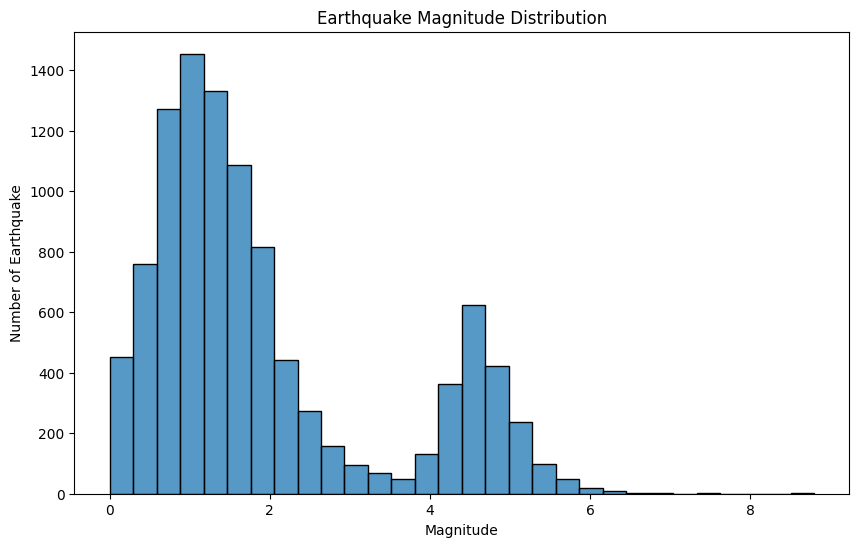

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='mag',bins=30)
plt.title("Earthquake Magnitude Distribution")
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquake')
plt.show()

In [36]:
df['Category'].value_counts()

Category
Minor       7754
Light       1223
Moderate    1214
Strong        23
Major          3
Name: count, dtype: int64

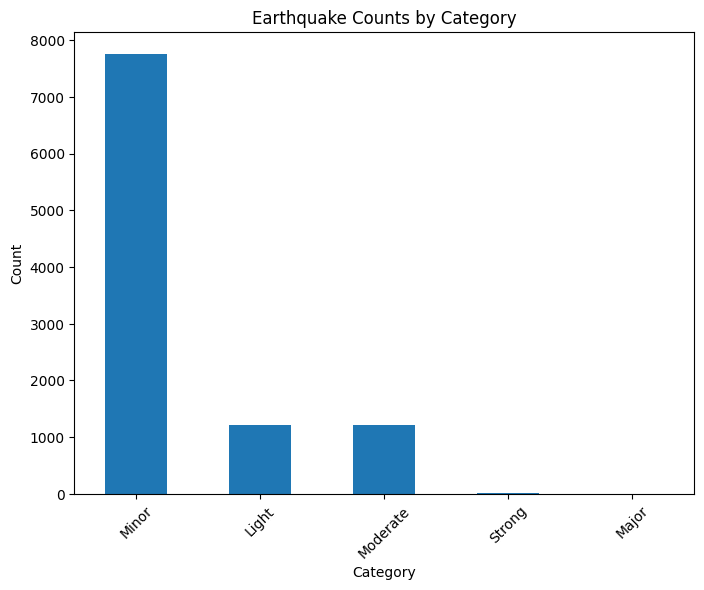

In [38]:
category_counts = pd.Series({'Minor':7754,'Light':1223,'Moderate':1214,'Strong':23,'Major':3})
plt.figure(figsize=(8,6))
category_counts.plot(kind='bar')
plt.title('Earthquake Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

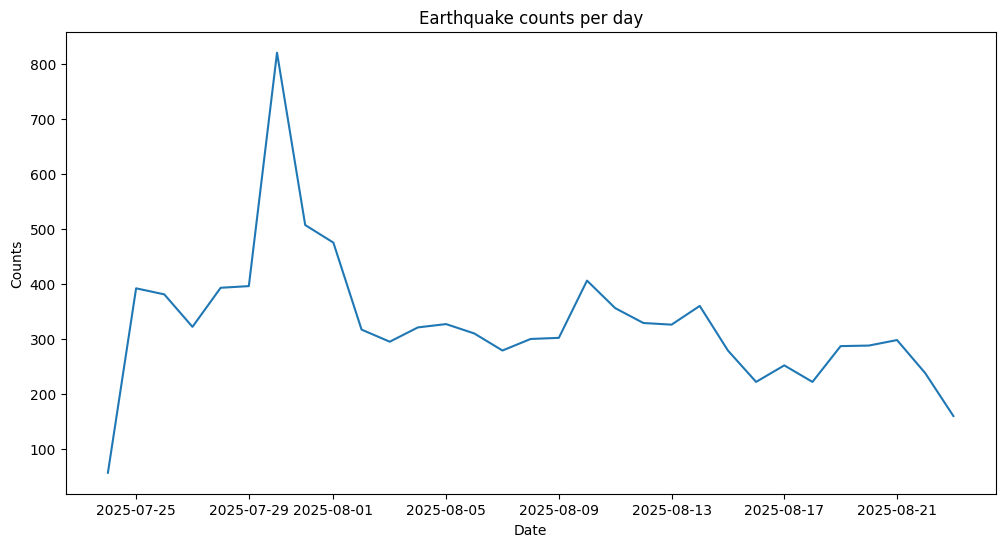

In [65]:
daily_counts=df.groupby(df['time'].dt.date).size()

plt.figure(figsize=(12,6))
daily_counts.plot()
plt.title("Earthquake counts per day")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.show()

In [70]:
major_quakes = df[df['mag'] >= 5.5]
top_major_locations = major_quakes['place'].str.extract(r',\s*(.*)$')[0].value_counts().head(5)

print("Top 5 locations for Major Earthquakes:")
print(top_major_locations)

Top 5 locations for Major Earthquakes:
place
south of Tonga                       3
Macquarie Island region              3
west of Macquarie Island             2
south of the Fiji Islands            2
166 km SSE of Vilyuchinsk, Russia    2
Name: count, dtype: int64


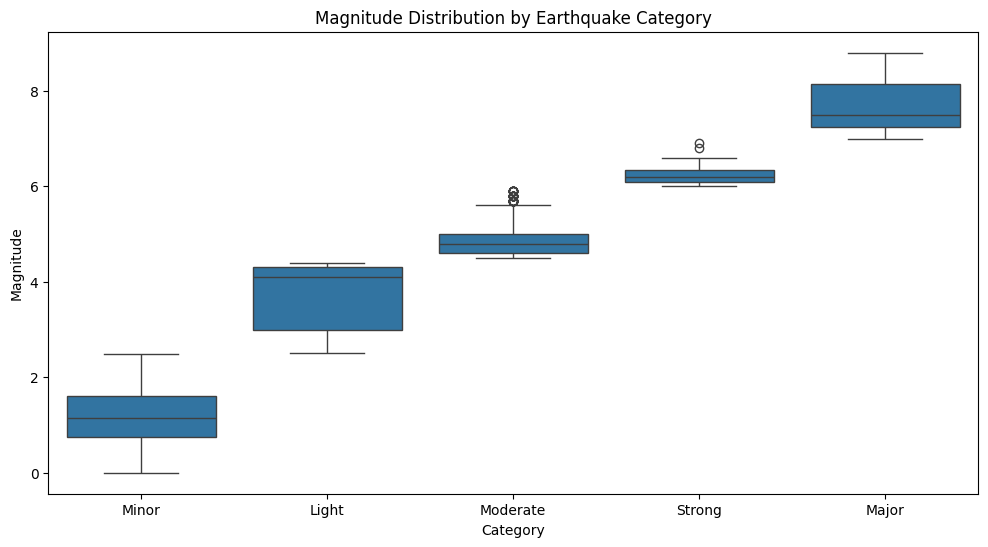

In [71]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Category',y='mag')
plt.title('Magnitude Distribution by Earthquake Category')
plt.xlabel('Category')
plt.ylabel('Magnitude')
plt.show()

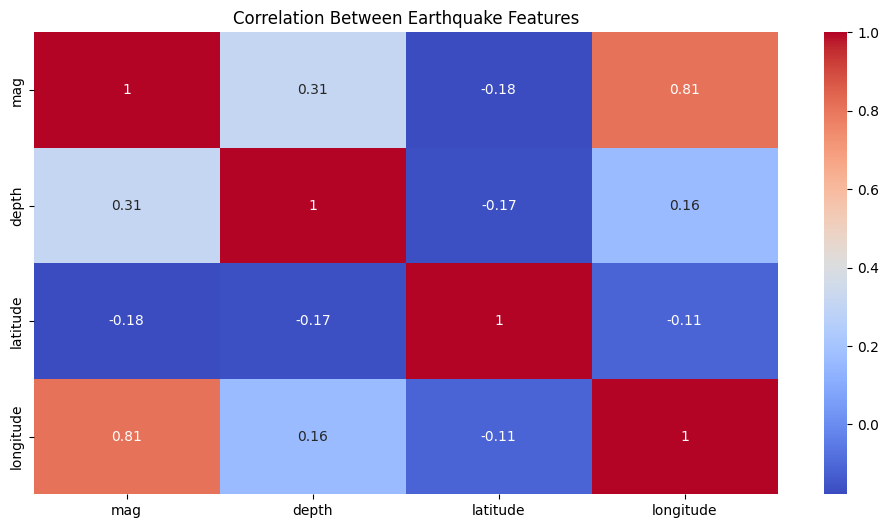

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['mag','depth','latitude','longitude']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Earthquake Features')
plt.show()

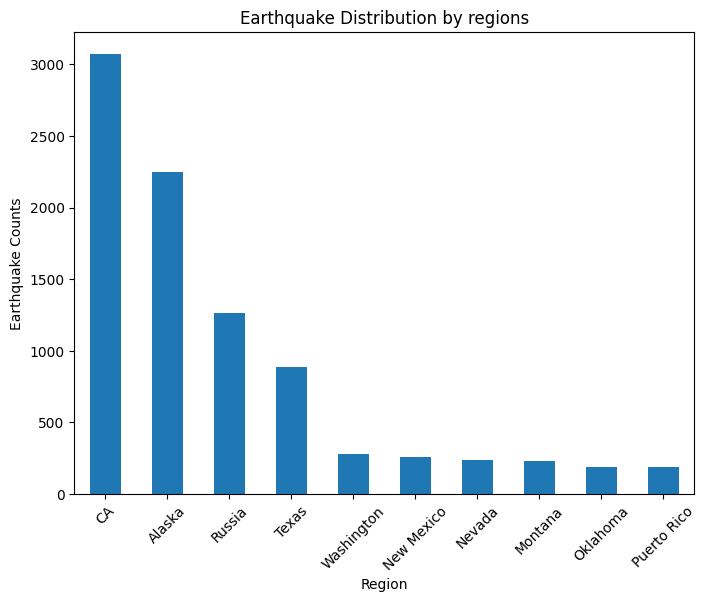

In [78]:
region_counts = df['place'].str.extract(r',\s*(.*)$')[0].value_counts().head(10)
plt.figure(figsize=(8,6))
region_counts.plot(kind='bar')
plt.title('Earthquake Distribution by regions')
plt.xlabel('Region')
plt.ylabel('Earthquake Counts')
plt.xticks(rotation=45)
plt.show()

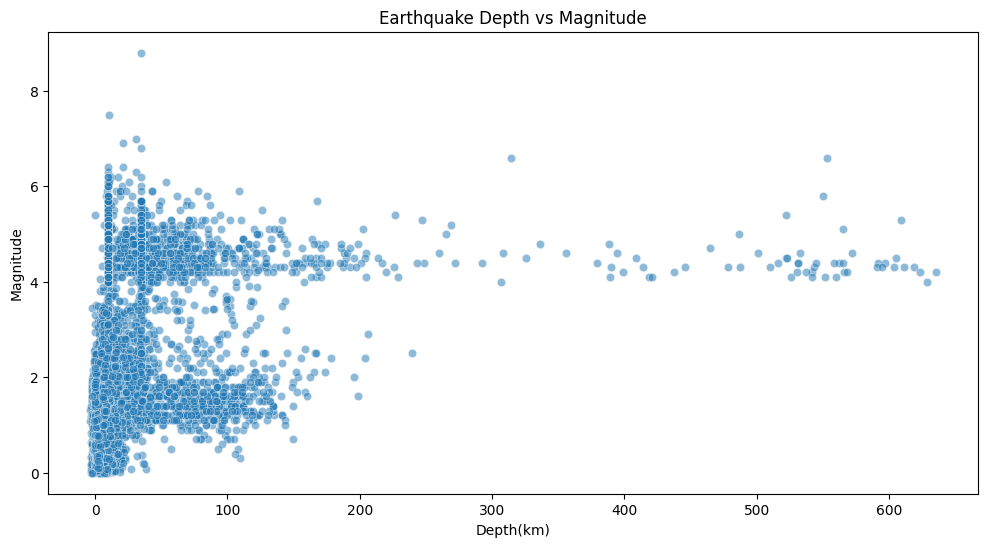

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='depth',y='mag',alpha=0.5)
plt.title('Earthquake Depth vs Magnitude')
plt.xlabel('Depth(km)')
plt.ylabel('Magnitude')
plt.show()

In [81]:
df_cleaned = df.copy()

In [83]:
df_cleaned.to_csv("Cleaned_Earthquake_Data.csv",index = False)